In [ ]:
import sklearn
import pandas as pd
import numpy as np
print("sklearn:", sklearn.__version__)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)


sklearn: 1.6.1
pandas: 2.2.2
numpy: 2.0.2


IMPORT  LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns



LOAD DATASET

In [ ]:
# Load dataset
df = pd.read_csv('/content/hd dataset.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [ ]:
print('Shape of the data is ', df.shape)

Shape of the data is  (319795, 18)


In [ ]:
df

,Target,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Target            319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.head()

,Target,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
df.tail()

,Target,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No
319794,No,46.56,No,No,No,0,0,No,Female,80 or older,Hispanic,No,Yes,Good,8,No,No,No


In [ ]:
df.dtypes

,0
Target,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,int64
MentalHealth,int64
DiffWalking,object
Sex,object
AgeCategory,object


DATA PREPROCESSSING

In [ ]:
#checking missing values

In [ ]:
print(df.isnull().sum())

Target              0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [ ]:
#remove duplicates

In [ ]:
print(df.duplicated().sum())

18078


In [ ]:
df = df.drop_duplicates()
df.shape

(301717, 18)

<ipython-input-11-097a04d0118c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].map({'Yes': 1, 'No': 0})
<ipython-input-11-097a04d0118c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_disease_counts.index, y=age_disease_counts.values, palette="coolwarm")


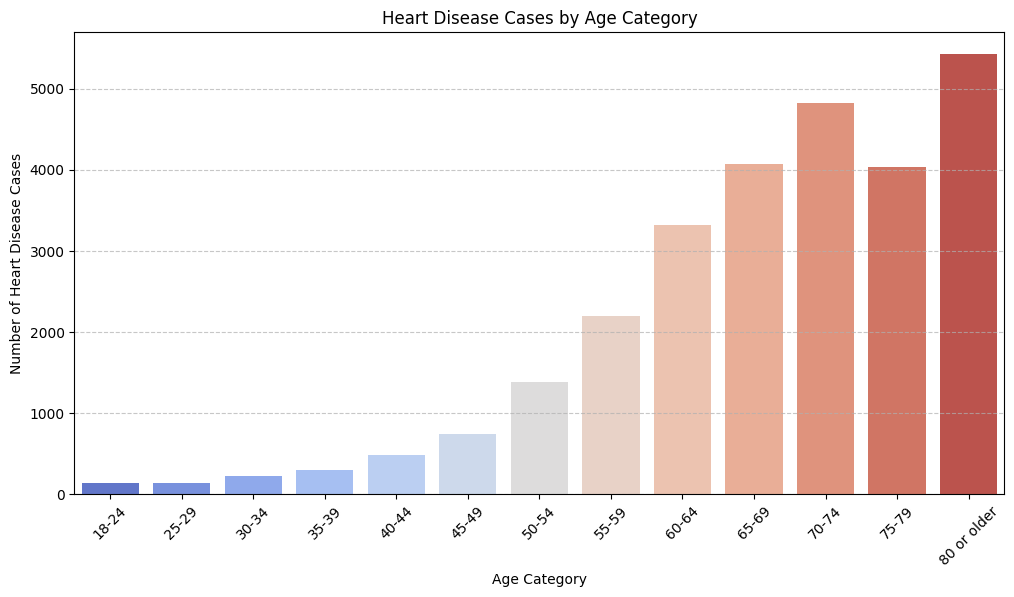

In [ ]:
df['Target'] = df['Target'].map({'Yes': 1, 'No': 0})

# Count the number of heart disease cases per age category
age_disease_counts = df[df['Target'] == 1]['AgeCategory'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=age_disease_counts.index, y=age_disease_counts.values, palette="coolwarm")

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel("Age Category")
plt.ylabel("Number of Heart Disease Cases")
plt.title("Heart Disease Cases by Age Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

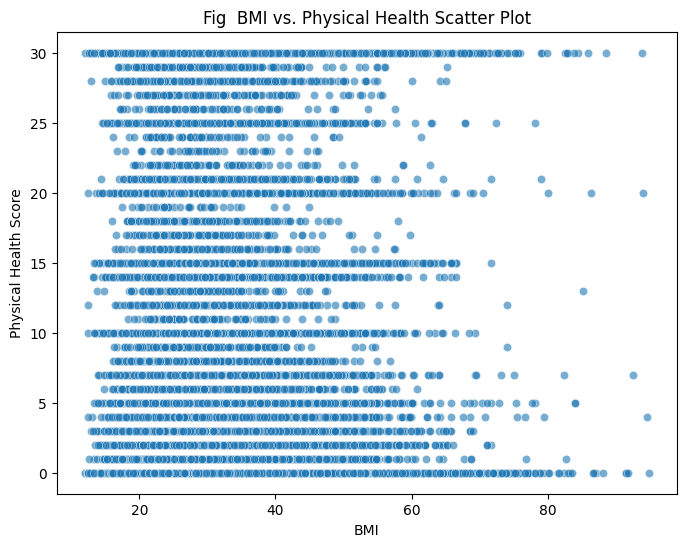

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





 #- BMI vs. Physical Health Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='PhysicalHealth', data=df, alpha=0.6)
plt.title("Fig  BMI vs. Physical Health Scatter Plot")
plt.xlabel("BMI")
plt.ylabel("Physical Health Score")
plt.show()



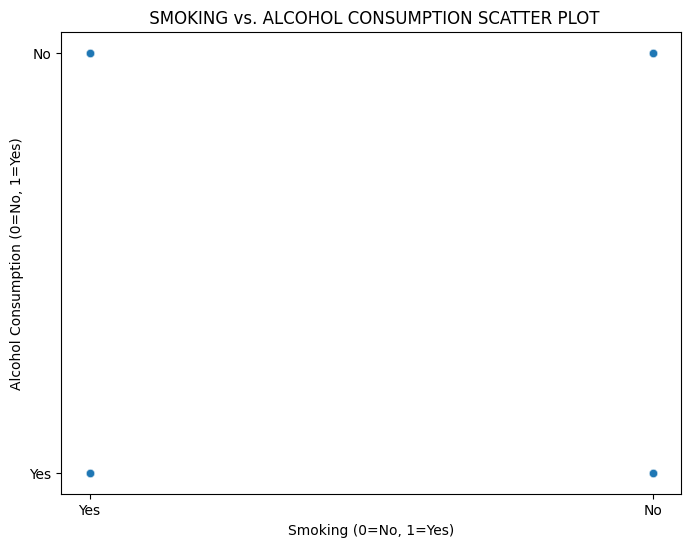

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





#  - Smoking vs. Alcohol Consumption Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Smoking', y='AlcoholDrinking', data=df, alpha=0.6)
plt.title(" SMOKING vs. ALCOHOL CONSUMPTION SCATTER PLOT")
plt.xlabel("Smoking (0=No, 1=Yes)")
plt.ylabel("Alcohol Consumption (0=No, 1=Yes)")
plt.show()



<ipython-input-9-0b75e3258a01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PhysicalActivity', y='BMI', data=df, palette='coolwarm')


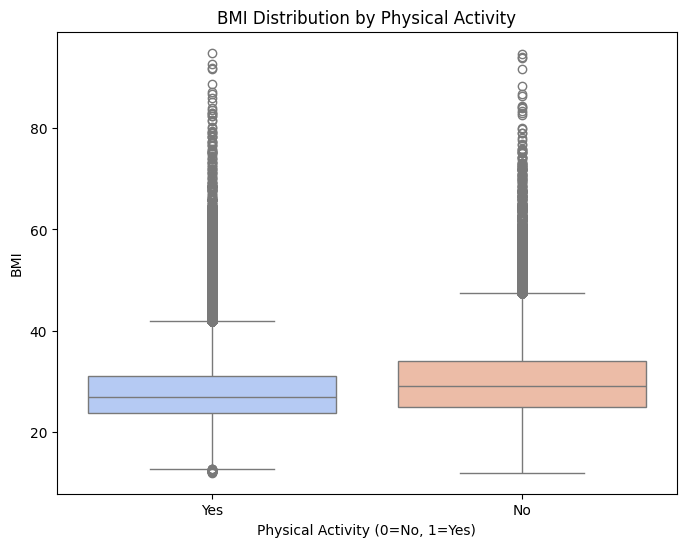

In [ ]:


plt.figure(figsize=(8, 6))
sns.boxplot(x='PhysicalActivity', y='BMI', data=df, palette='coolwarm')
plt.title("BMI Distribution by Physical Activity")
plt.xlabel("Physical Activity (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()




In [ ]:
import plotly.express as px

# Count occurrences of heart disease by sex
sex_heart_disease_counts = df['Sex'][df['Target'] == 1].value_counts()

# Create a pie chart using Plotly
fig = px.pie(values=sex_heart_disease_counts.values,
             names=sex_heart_disease_counts.index,
             template='plotly_dark',
             title='Does Sex Affect Heart Disease?')

# Customize text display
fig.update_traces(textinfo='label+percent')

# Show the figure
fig.show()


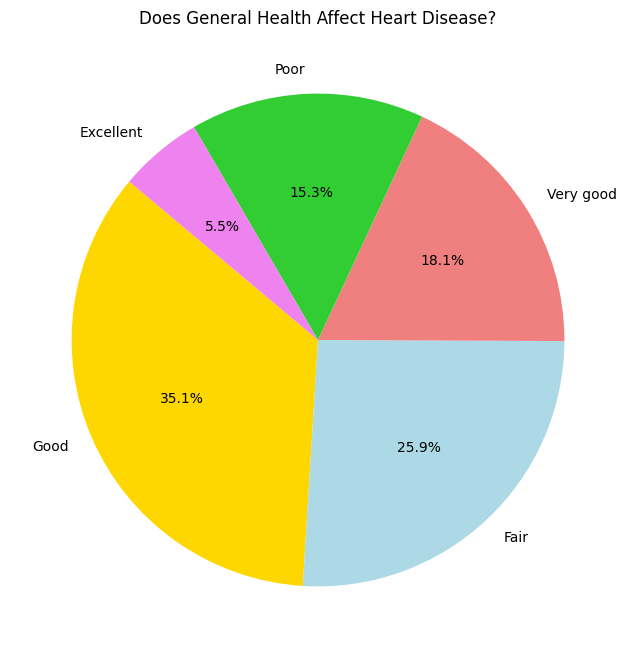

In [ ]:
# Count occurrences of heart disease by general health status
gen_health_heart_disease_counts = df['GenHealth'][df['Target'] == 1].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(gen_health_heart_disease_counts.values, labels=gen_health_heart_disease_counts.index,
        autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightcoral', 'limegreen', 'violet'], startangle=140)

# Title and display
plt.title("Does General Health Affect Heart Disease?")
plt.show()


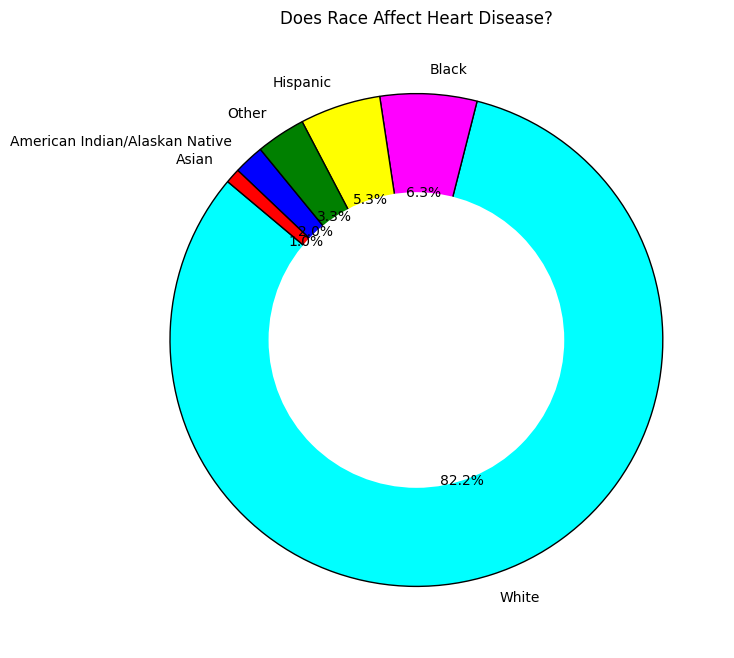

In [ ]:
# Count occurrences of heart disease by race
race_heart_disease_counts = df[df['Target'] == 1]['Race'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(race_heart_disease_counts.values, labels=race_heart_disease_counts.index,
        autopct='%1.1f%%', startangle=140, colors=['cyan', 'magenta', 'yellow', 'green', 'blue', 'red'],
        wedgeprops={'edgecolor': 'black'})

# Add a center circle for a donut effect
center_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_artist(center_circle)

# Title and display
plt.title("Does Race Affect Heart Disease?")
plt.show()







<ipython-input-22-83953299b2b1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




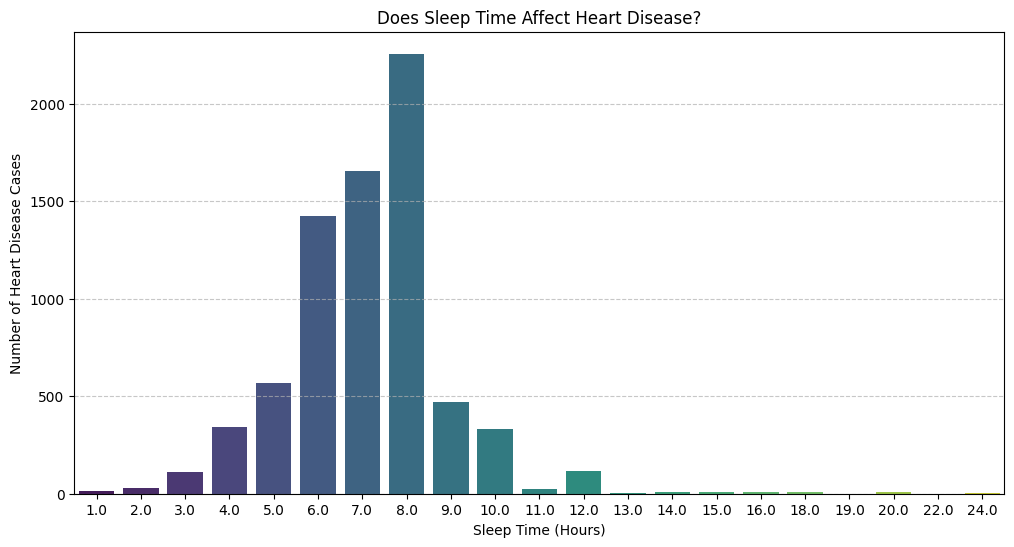

In [ ]:
# Count occurrences of heart disease by sleep time categories
sleep_heart_disease_counts = df['SleepTime'][df['Target'] == 1].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sleep_heart_disease_counts.index, y=sleep_heart_disease_counts.values, palette="viridis")

# Customize the plot
plt.xlabel("Sleep Time (Hours)")
plt.ylabel("Number of Heart Disease Cases")
plt.title("Does Sleep Time Affect Heart Disease?")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


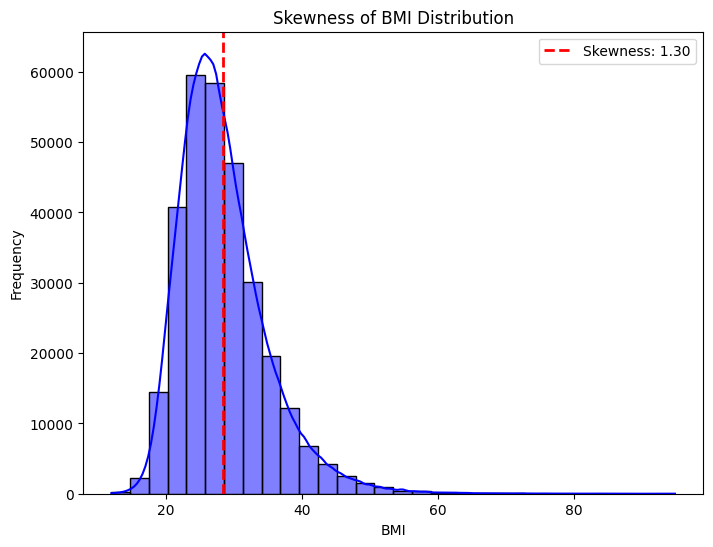

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot histogram and KDE for BMI
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, bins=30, color='blue')
plt.title("Skewness of BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

# Calculate and display skewness value
skewness = stats.skew(df['BMI'])
plt.axvline(df['BMI'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Skewness: {skewness:.2f}')
plt.legend()

plt.show()


In [ ]:
# Ensure Reproducibility
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

In [ ]:
# Convert 'Target' to numerical if it's categorical

In [ ]:

if df['Target'].dtype == 'object':
    le = LabelEncoder()
    df['Target'] = le.fit_transform(df['Target'])
    print("Target column encoded.")



In [ ]:
# Feature Engineering


In [ ]:
df['Health_Score'] = df['PhysicalHealth'] + df['MentalHealth']
age_mapping = {
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5,
    '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10,
    '70-74': 11, '75-79': 12, '80 or older': 13
}
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)
print("Feature engineering completed.")

Feature engineering completed.


<ipython-input-14-064fd6bf25f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Health_Score'] = df['PhysicalHealth'] + df['MentalHealth']
<ipython-input-14-064fd6bf25f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeCategory'] = df['AgeCategory'].map(age_mapping)


In [ ]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Target')  # Exclude target from numerical processing



Plot Distribution of Numerical Features

<ipython-input-26-620451eeba0c>:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data=df, x=col, hue="Target", multiple="stack", palette=mypal[1::4])


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x78917fadeac0> (for post_execute):


KeyboardInterrupt: 

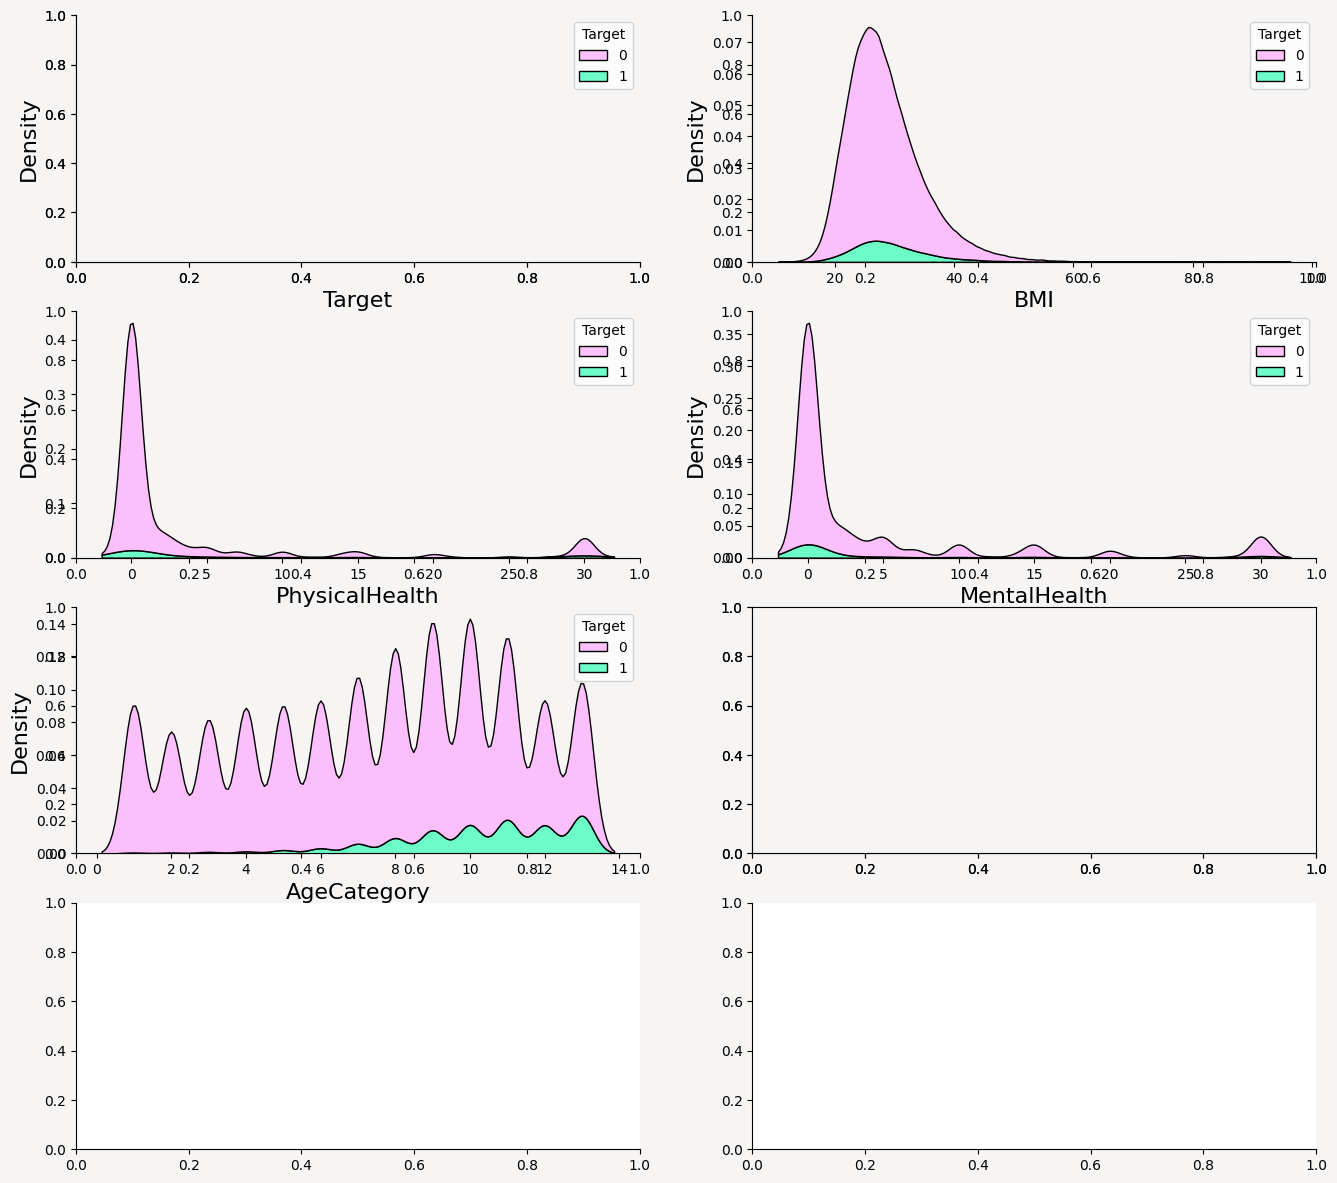

In [ ]:


# Define custom color palette
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC', '#F3FEFA', '#B4FFE4', '#3FFEBA']

# Identify numerical features before selection
num_feats = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Grid setup for subplots
L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

# Create Figure
fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    # KDE Plot for numerical features before transformation
    ax = sns.kdeplot(data=df, x=col, hue="Target", multiple="stack", palette=mypal[1::4])
    ax.set_xlabel(col, fontsize=16)
    ax.set_ylabel("Density", fontsize=16)

    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    i += 1

plt.suptitle('Distribution of Numerical Features (Before Selection & Conversion)', fontsize=24)
plt.show()















 Plot Distribution of Categorical Features

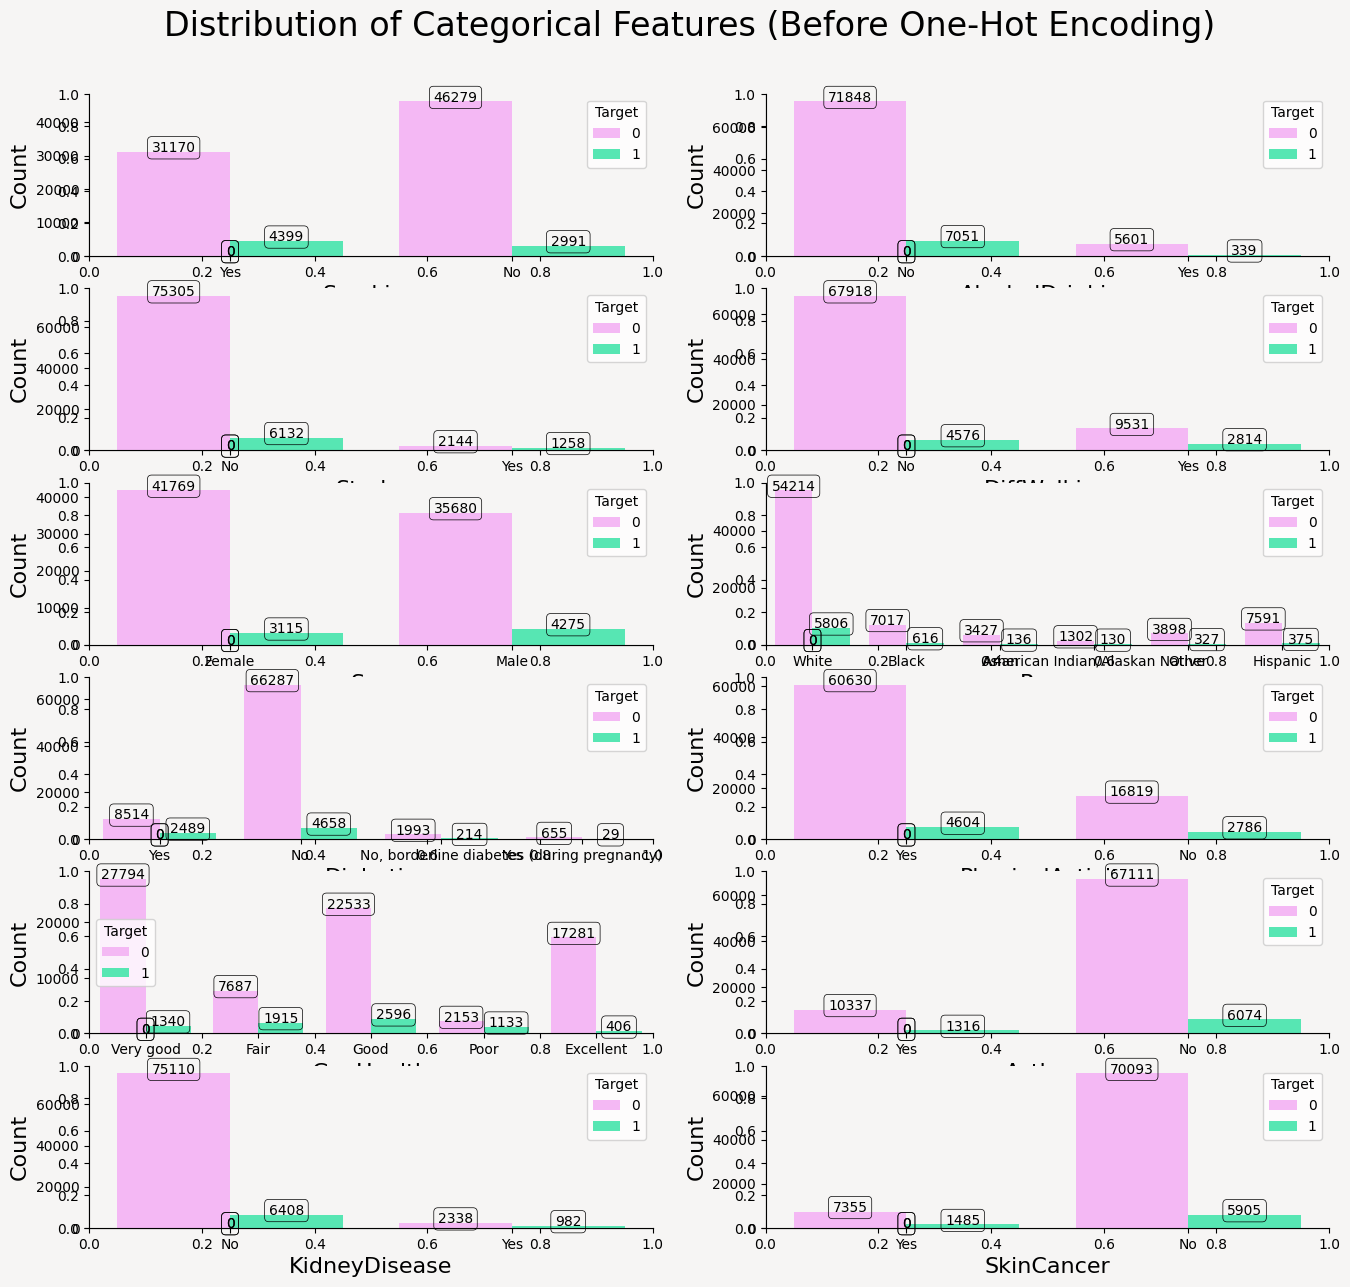

In [ ]:
# Identify categorical features before transformation
cat_feats = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Grid setup for subplots
L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

# Create Figure
fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in cat_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    # Countplot for categorical features before encoding
    ax = sns.countplot(data=df, x=col, hue="Target", palette=mypal[1::4])

    # Add value labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center",
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    ax.set_xlabel(col, fontsize=16)
    ax.set_ylabel("Count", fontsize=16)

    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    i += 1

plt.suptitle('Distribution of Categorical Features (Before One-Hot Encoding)', fontsize=24)
plt.show()


In [ ]:
# Convert categorical variables into numerical using One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))
print("One-Hot Encoding completed.")



One-Hot Encoding completed.


In [ ]:
categorical_encoded_df = categorical_encoded_df.astype('float16')
print(categorical_encoded_df.dtypes)

Smoking_Yes                         float16
AlcoholDrinking_Yes                 float16
Stroke_Yes                          float16
DiffWalking_Yes                     float16
Sex_Male                            float16
Race_Asian                          float16
Race_Black                          float16
Race_Hispanic                       float16
Race_Other                          float16
Race_White                          float16
Diabetic_No, borderline diabetes    float16
Diabetic_Yes                        float16
Diabetic_Yes (during pregnancy)     float16
PhysicalActivity_Yes                float16
GenHealth_Fair                      float16
GenHealth_Good                      float16
GenHealth_Poor                      float16
GenHealth_Very good                 float16
Asthma_Yes                          float16
KidneyDisease_Yes                   float16
SkinCancer_Yes                      float16
dtype: object


In [ ]:
# Normalize numerical features using Z-score normalization
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_cols])
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_cols)
print("Feature scaling completed.")
numerical_scaled_df = numerical_scaled_df.astype('float16')

Feature scaling completed.


In [ ]:

print(numerical_scaled_df.head())  # Display first few rows
print(numerical_scaled_df.dtypes)


        BMI  PhysicalHealth  MentalHealth  AgeCategory  SleepTime  \
0 -1.831055       -0.070312      3.183594     0.136841  -1.420898   
1 -1.252930       -0.438721     -0.506836     1.532227  -0.057648   
2 -0.287842        2.017578      3.183594     0.694824   0.624023   
3 -0.654297       -0.438721     -0.506836     1.252930  -0.739258   
4 -0.731445        3.000000     -0.506836    -0.700195   0.624023   

   Health_Score  
0      1.944336  
1     -0.591309  
2      3.250000  
3     -0.591309  
4      1.560547  
BMI               float16
PhysicalHealth    float16
MentalHealth      float16
AgeCategory       float16
SleepTime         float16
Health_Score      float16
dtype: object


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [ ]:
# Combine processed numerical and categorical features
df_processed = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)
print("Data preprocessing completed. Columns in df_processed:", df_processed.columns.tolist())

df_processed.dtypes


Data preprocessing completed. Columns in df_processed: ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime', 'Health_Score', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes', 'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']


,0
BMI,float16
PhysicalHealth,float16
MentalHealth,float16
AgeCategory,float16
SleepTime,float16
Health_Score,float16
Smoking_Yes,float16
AlcoholDrinking_Yes,float16
Stroke_Yes,float16
DiffWalking_Yes,float16


In [ ]:
print(df_processed.isnull().sum())


BMI                                 0
PhysicalHealth                      0
MentalHealth                        0
AgeCategory                         0
SleepTime                           0
Health_Score                        0
Smoking_Yes                         0
AlcoholDrinking_Yes                 0
Stroke_Yes                          0
DiffWalking_Yes                     0
Sex_Male                            0
Race_Asian                          0
Race_Black                          0
Race_Hispanic                       0
Race_Other                          0
Race_White                          0
Diabetic_No, borderline diabetes    0
Diabetic_Yes                        0
Diabetic_Yes (during pregnancy)     0
PhysicalActivity_Yes                0
GenHealth_Fair                      0
GenHealth_Good                      0
GenHealth_Poor                      0
GenHealth_Very good                 0
Asthma_Yes                          0
KidneyDisease_Yes                   0
SkinCancer_Y

In [ ]:
df_processed.dtypes

,0
BMI,float16
PhysicalHealth,float16
MentalHealth,float16
AgeCategory,float16
SleepTime,float16
Health_Score,float16
Smoking_Yes,float16
AlcoholDrinking_Yes,float16
Stroke_Yes,float16
DiffWalking_Yes,float16


FEATURE SELECTION

In [ ]:
# Apply PCA
pca = PCA(n_components=10, random_state=42)  # Select top 10 principal components
X_pca = pca.fit_transform(df_processed)
print("PCA transformation successful. Explained Variance Ratio:", pca.explained_variance_ratio_)

# Select the most significant features from PCA components
feature_contributions = pd.DataFrame(
    pca.components_, columns=df_processed.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
top_features = feature_contributions.abs().sum().sort_values(ascending=False).index[:10]
df_selected = df_processed[top_features]
print("Top 10 PCA-selected features:", list(top_features))

PCA transformation successful. Explained Variance Ratio: [0.28785014 0.1460792  0.12290883 0.10981778 0.07638938 0.03924157
 0.03303078 0.02684852 0.02613541 0.01972958]
Top 10 PCA-selected features: ['AgeCategory', 'Sex_Male', 'Smoking_Yes', 'Race_White', 'MentalHealth', 'SleepTime', 'PhysicalHealth', 'BMI', 'PhysicalActivity_Yes', 'GenHealth_Good']


PLOT FOR FEATURE SELECTION

<ipython-input-24-b6173e402151>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_contributions.values[:10], y=top_features_contributions.index[:10], palette="Blues_r")


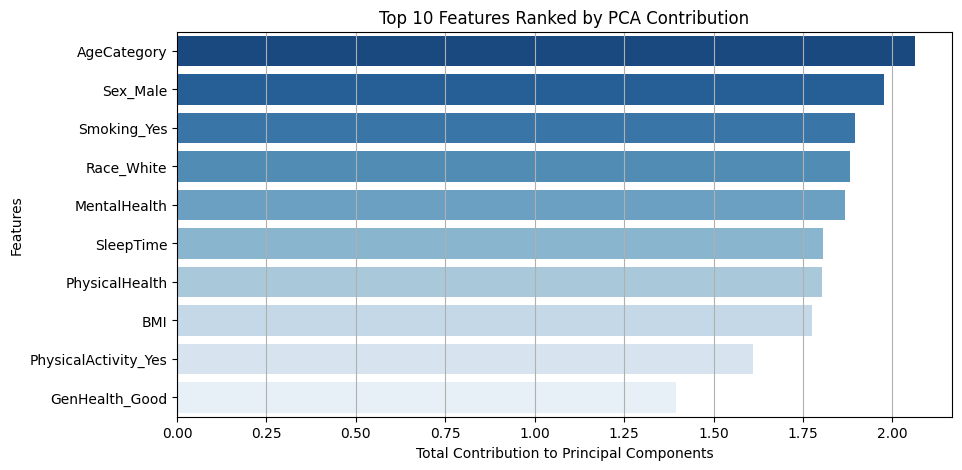

In [ ]:


# Sort features by importance
top_features_contributions = feature_contributions.abs().sum().sort_values(ascending=False)

# Plot the ranked top features
plt.figure(figsize=(10, 5))
sns.barplot(x=top_features_contributions.values[:10], y=top_features_contributions.index[:10], palette="Blues_r")
plt.xlabel("Total Contribution to Principal Components")
plt.ylabel("Features")
plt.title("Top 10 Features Ranked by PCA Contribution")
plt.grid(axis='x')

plt.show()


In [ ]:
# Define target variable
y = df['Target']

DISTRIBUTION OF TARGET VARIABLE

<ipython-input-42-d9d7868614fd>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




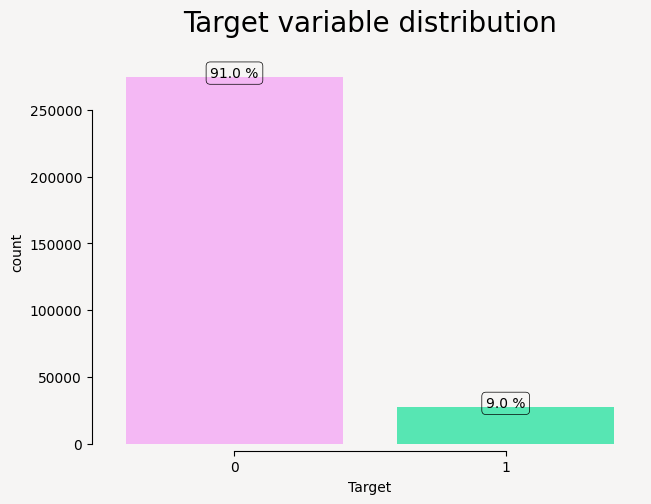

In [ ]:


mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['Target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)


In [ ]:

# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_selected, y)
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)
X_resampled = X_resampled.reset_index(drop=True)
y_resampled = y_resampled.reset_index(drop=True)
print(X_resampled)

        AgeCategory  Sex_Male  Smoking_Yes  Race_White  MentalHealth  \
0         -0.059174       1.0          1.0         1.0     -0.506836   
1          1.051758       0.0          0.0         1.0     -0.506836   
2         -1.816406       0.0          0.0         0.0     -0.506836   
3          0.415771       0.0          1.0         1.0      1.337891   
4         -0.979004       1.0          1.0         0.0     -0.506836   
...             ...       ...          ...         ...           ...   
548907     0.694824       1.0          0.0         1.0     -0.506836   
548908    -1.537109       0.0          1.0         0.0      2.568359   
548909     0.694824       1.0          0.0         1.0     -0.506836   
548910     0.415771       0.0          0.0         1.0      1.953125   
548911     1.252930       0.0          0.0         1.0     -0.506836   

        SleepTime  PhysicalHealth       BMI  PhysicalActivity_Yes  \
0       -0.739258       -0.438721  1.098633                   1.0 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(548912, 10)
(548912,)


AFTER BALANCING TARGET VARIABLE DISTRIBUTION PLOT

<ipython-input-28-82e2f5d06a50>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_resampled['Target'], palette=mypal[1::4])  # Apply custom colors


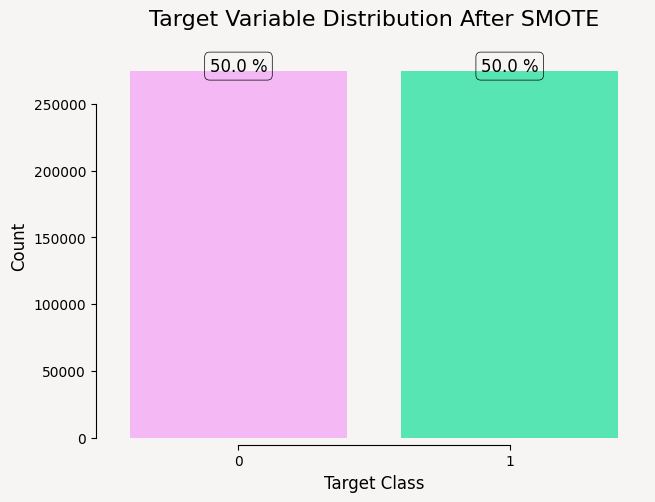

In [ ]:



# Define custom color palette
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

# Create a DataFrame for visualization
df_resampled = pd.DataFrame(X_resampled, columns=df_selected.columns)
df_resampled['Target'] = y_resampled  # Add target column

# Plot settings
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
total = float(len(df_resampled))
ax = sns.countplot(x=df_resampled['Target'], palette=mypal[1::4])  # Apply custom colors
ax.set_facecolor('#F6F5F4')

# Add percentage labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:1.1f} %'.format((height/total)*100),
            ha="center", fontsize=12,
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

# Titles and layout adjustments
ax.set_title('Target Variable Distribution After SMOTE', fontsize=16, y=1.05)
ax.set_xlabel("Target Class", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()



In [ ]:
print(y_resampled)

0         1
1         1
2         0
3         1
4         0
         ..
548907    0
548908    0
548909    1
548910    0
548911    0
Name: Target, Length: 548912, dtype: int64


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print("Data split into training and testing sets.")
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


Data split into training and testing sets.
(384238, 10) (384238,)
(164674, 10) (164674,)


TRAIN INDIVIDUAL MODELS

In [ ]:
# Train individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

models = {'Random Forest': rf, 'Decision Tree': dt, 'Gradient Boosting': gb}
accuracies = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f} (CV Avg: {scores.mean():.4f})")

Random Forest Accuracy: 0.8883 (CV Avg: 0.8856)
Decision Tree Accuracy: 0.8673 (CV Avg: 0.8634)
Gradient Boosting Accuracy: 0.8246 (CV Avg: 0.8257)


PLOT FOR MODEL ACCURACY COMPARISON

<ipython-input-51-e24451588159>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-51-e24451588159>:9: UserWarning:


The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.



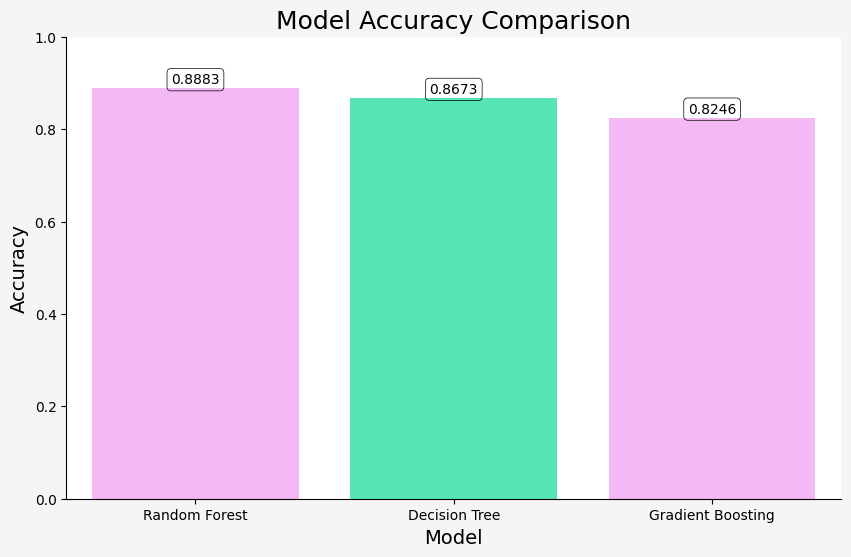

In [ ]:


# Define custom color palette
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC', '#F3FEFA', '#B4FFE4', '#3FFEBA']

# Convert accuracies dictionary to DataFrame
accuracy_df = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])

# Create figure
plt.figure(figsize=(10, 6), facecolor='#F6F5F4')
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette=mypal[1::4])

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01, f'{height:.4f}', ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

# Formatting
ax.set_ylim(0, 1)
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_title("Model Accuracy Comparison", fontsize=18)
sns.despine()

plt.show()


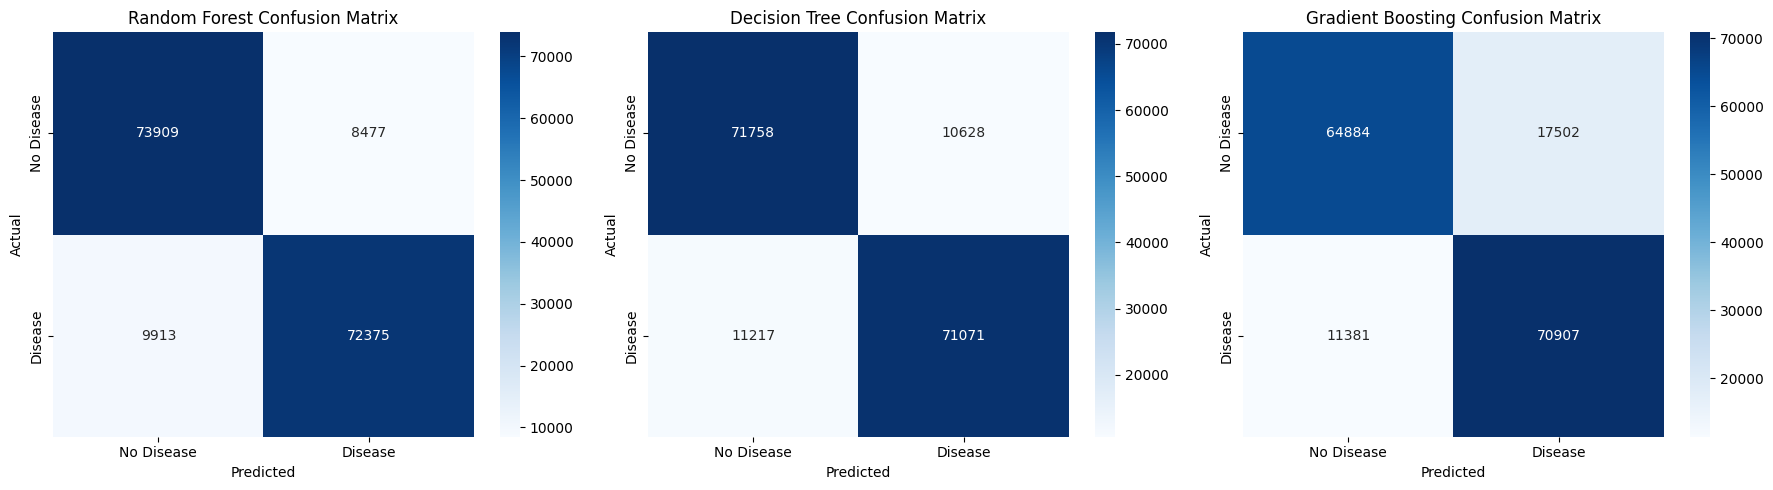

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"], ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


 ENSEMBLE MODELS

In [ ]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('dt', dt), ('gb', gb)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"\nVoting Classifier Accuracy: {accuracy_voting:.4f}")



precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, y_pred_voting)

print(f"\n🔹 Voting Classifier Model Performance:")
print(f"✅ Accuracy: {accuracy_voting:.4f}")
print(f"✅ Precision: {precision_voting:.4f}")
print(f"✅ Recall: {recall_voting:.4f}")
print(f"✅ F1-score: {f1_voting:.4f}")
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")





Voting Classifier Accuracy: 0.8790

🔹 Voting Classifier Model Performance:
✅ Accuracy: 0.8790
✅ Precision: 0.8792
✅ Recall: 0.8785
✅ F1-score: 0.8789
Voting Classifier Accuracy: 0.8790


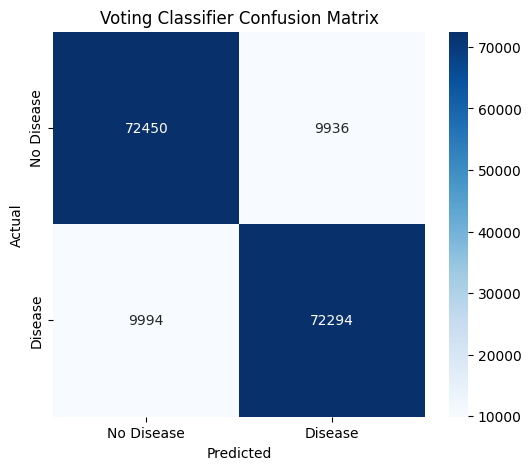

In [ ]:


# Compute confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Bagging Classifier
bagging_rf = BaggingClassifier(estimator=rf, n_estimators=15, random_state=42)
bagging_rf.fit(X_train, y_train)
y_pred_bagging_rf = bagging_rf.predict(X_test)

# Calculate performance metrics for Bagging Classifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging_rf)
precision_bagging = precision_score(y_test, y_pred_bagging_rf)
recall_bagging = recall_score(y_test, y_pred_bagging_rf)
f1_bagging = f1_score(y_test, y_pred_bagging_rf)
roc_auc_bagging = roc_auc_score(y_test, y_pred_bagging_rf)

# Print Model Performance
print(f"\n🔹 Bagging Classifier Model Performance:")
print(f"✅ Accuracy: {accuracy_bagging:.4f}")
print(f"✅ Precision: {precision_bagging:.4f}")
print(f"✅ Recall: {recall_bagging:.4f}")
print(f"✅ F1-score: {f1_bagging:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc_bagging:.4f}")



🔹 Bagging Classifier Model Performance:
✅ Accuracy: 0.8913
✅ Precision: 0.8914
✅ Recall: 0.8911
✅ F1-score: 0.8913
✅ ROC-AUC Score: 0.8913


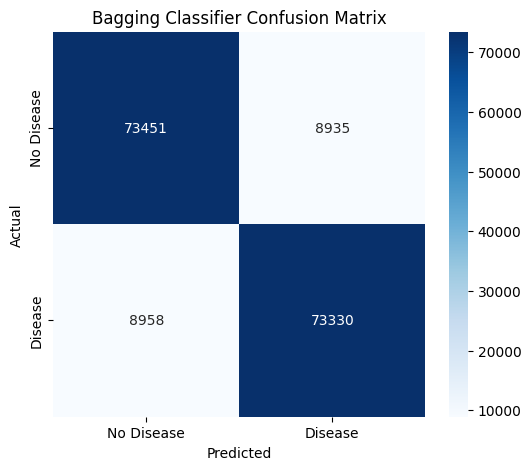

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_bagging = confusion_matrix(y_test, y_pred_bagging_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Bagging Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


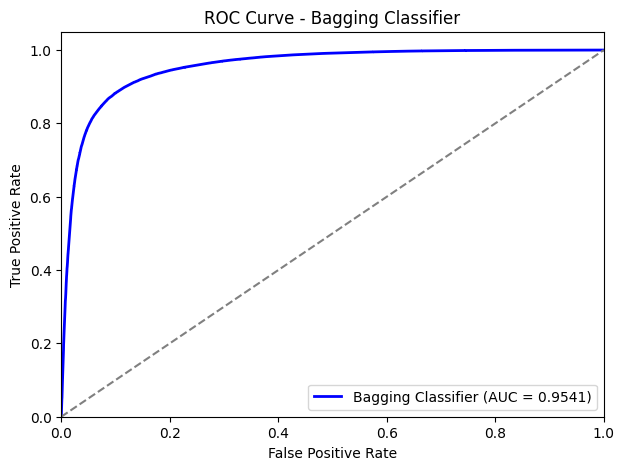

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs_bagging = bagging_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs_bagging)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Bagging Classifier (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bagging Classifier")
plt.legend(loc="lower right")
plt.show()


PLOT FOR ACCURACY COMPARISON

<ipython-input-58-6b252505a324>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




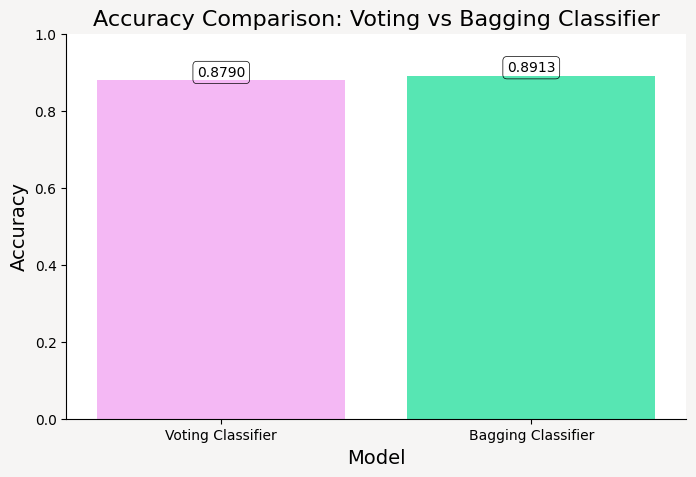

In [ ]:


# Define custom color palette
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC', '#F3FEFA', '#B4FFE4', '#3FFEBA']

# Accuracy dictionary for visualization
accuracy_dict = {
    "Voting Classifier": accuracy_voting,
    "Bagging Classifier": accuracy_bagging
}

# Convert to DataFrame
accuracy_df = pd.DataFrame(accuracy_dict.items(), columns=['Model', 'Accuracy'])

# Create figure
plt.figure(figsize=(8, 5), facecolor='#F6F5F4')
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette=mypal[1::4])

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01, f'{height:.4f}', ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

# Formatting
ax.set_ylim(0, 1)
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_title("Accuracy Comparison: Voting vs Bagging Classifier", fontsize=16)
sns.despine()

plt.show()


PLOT FOR MODEL PERFORMANCE COMPARSION

<ipython-input-60-4d191ee5f1d3>:18: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



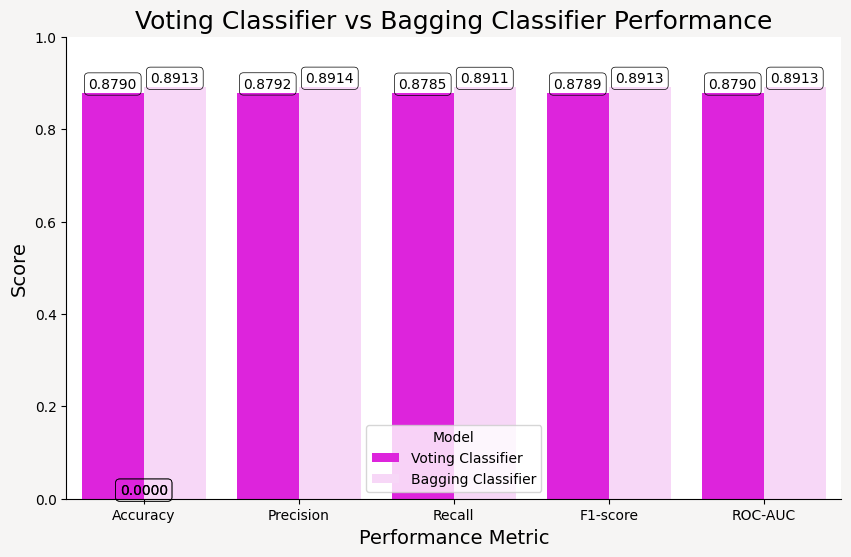

In [ ]:

# Define custom color palette
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC', '#F3FEFA', '#B4FFE4', '#3FFEBA']

# Create a DataFrame for model performance metrics
performance_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Voting Classifier': [accuracy_voting, precision_voting, recall_voting, f1_voting, roc_auc_voting],
    'Bagging Classifier': [accuracy_bagging, precision_bagging, recall_bagging, f1_bagging, roc_auc_bagging]
}

performance_df = pd.DataFrame(performance_data)

# Melt dataframe for better visualization
performance_df = performance_df.melt(id_vars="Metric", var_name="Model", value_name="Score")

# Create figure
plt.figure(figsize=(10, 6), facecolor='#F6F5F4')
ax = sns.barplot(data=performance_df, x='Metric', y='Score', hue='Model', palette=mypal[::2])

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01, f'{height:.4f}', ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

# Formatting
ax.set_ylim(0, 1)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Performance Metric", fontsize=14)
ax.set_title("Voting Classifier vs Bagging Classifier Performance", fontsize=18)
sns.despine()

plt.show()

BEST MODEL PLOT

<ipython-input-61-b74a4baa6ff1>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-61-b74a4baa6ff1>:36: UserWarning:


The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.



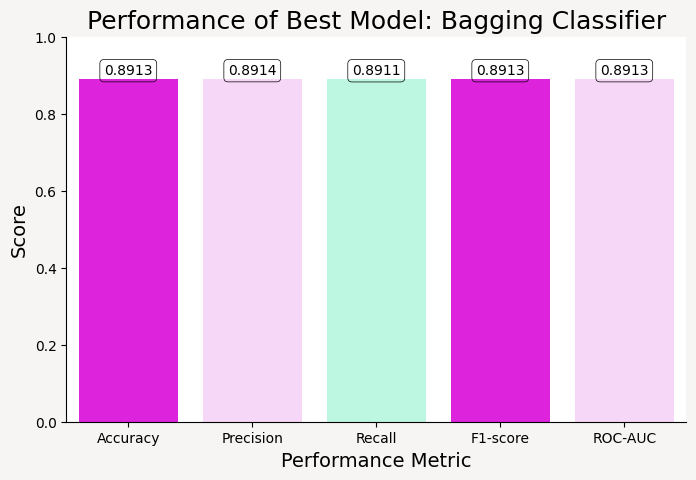

In [ ]:
# Define custom color palette
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC', '#F3FEFA', '#B4FFE4', '#3FFEBA']

# Store model performance
model_scores = {
    "Voting Classifier": accuracy_voting,
    "Bagging Classifier": accuracy_bagging
}

# Find the best model based on accuracy
best_model_name = max(model_scores, key=model_scores.get)

# Store its performance metrics
if best_model_name == "Voting Classifier":
    best_metrics = {
        "Accuracy": accuracy_voting,
        "Precision": precision_voting,
        "Recall": recall_voting,
        "F1-score": f1_voting,
        "ROC-AUC": roc_auc_voting
    }
else:
    best_metrics = {
        "Accuracy": accuracy_bagging,
        "Precision": precision_bagging,
        "Recall": recall_bagging,
        "F1-score": f1_bagging,
        "ROC-AUC": roc_auc_bagging
    }

# Convert to DataFrame
best_model_df = pd.DataFrame(best_metrics.items(), columns=['Metric', 'Score'])

# Plot
plt.figure(figsize=(8, 5), facecolor='#F6F5F4')
ax = sns.barplot(data=best_model_df, x='Metric', y='Score', palette=mypal[::2])

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01, f'{height:.4f}', ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

# Formatting
ax.set_ylim(0, 1)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Performance Metric", fontsize=14)
ax.set_title(f"Performance of Best Model: {best_model_name}", fontsize=18)
sns.despine()

plt.show()